In [1]:
# Model Steps:

# 1-Training Data
# 2-Preprocessing
# 3-Arch.
# 4-Fine Tune, Pre-trained mode
# 5-Optimize Hyperparameters
# 6-Evalutaion
# 7-Deploy

In [3]:
import keras,os
import cv2
import imgaug.augmenters as iaa  
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from tensorflow.keras import applications

In [4]:
train='/home/ahmed/Desktop/GP Progress/Casting/train'
test='/home/ahmed/Desktop/GP Progress/Casting/test'

In [5]:
# Data Augmentation when needed only


# # define the augmentation pipeline
# seq = iaa.Sequential([
#     iaa.Fliplr(0.5), # flip horizontally with 50% probability
#     iaa.Flipud(0.5), # flip vertically with 50% probability
#     iaa.Affine(rotate=(-5, 5)), # rotate images by -5 to +5 degrees
#     iaa.AdditiveGaussianNoise(scale=(0, 0.1*255)), # add Gaussian noise with std dev between 0 and 0.1
#     iaa.GammaContrast(gamma=(0.5, 1.5)), # adjust gamma by a factor of 0.5 to 1.5
#     iaa.Sometimes(0.5, iaa.Crop(percent=(0, 0.1))), # crop images by up to 10% with 50% probability
# ])

# # make sure the output directory exists
# if not os.path.exists(data_path):
#     os.makedirs(data_path)
    
# for filename in os.listdir(data_path):
#     # read the image
#     img = cv2.imread(os.path.join(data_path, filename))

#     # apply the augmentation pipeline
#     augmented_images = seq(images=[img])

#     # save the augmented images to the output directory
#     for i, image in enumerate(augmented_images):
#         cv2.imwrite(os.path.join(data_path, f"{filename.split('.')[0]}_{i}.jpg"), image)

In [6]:
trdata = ImageDataGenerator(rescale = 1/255.0,)

traindata = trdata.flow_from_directory(directory=train ,batch_size=32 ,
                                       target_size=(224,224), 
                                       shuffle=True,color_mode='rgb',class_mode='categorical')


tsdata = ImageDataGenerator(rescale= 1/255.0)
testdata = tsdata.flow_from_directory(directory=test, target_size=(224,224),color_mode='rgb',
                                      )


Found 14818 images belonging to 2 classes.
Found 977 images belonging to 2 classes.


In [7]:
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
for device in gpu_devices:
    tf.config.experimental.set_memory_growth(device, True)

2023-04-30 23:54:01.194697: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-04-30 23:54:01.240121: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [8]:
VGG= keras.applications.vgg16.VGG16(input_shape=(224,224,3), include_top=False, weights='imagenet')

In [9]:
VGG.trainable= False
#Not train the front 13 layers, train only last two layers

In [10]:
model = keras.Sequential([
    VGG,
    keras.layers.Flatten(),
    keras.layers.Dense(units=256, activation="relu"),
    keras.layers.Dense(units=256, activation="relu"),
    keras.layers.Dense(units=2, activation="softmax"),
    
])

In [11]:
model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 256)               6422784   
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 2)                 514       
                                                                 
Total params: 21,203,778
Trainable params: 6,489,090
Non-trainable params: 14,714,688
_________________________________________________________________


In [13]:
hist = model.fit(traindata,steps_per_epoch=460, validation_data=testdata, validation_steps=30, epochs=5)
model.save('vggclf_v10.h5')

Epoch 1/5


2023-04-30 23:57:48.951522: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2023-04-30 23:57:49.642988: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 411041792 exceeds 10% of free system memory.
2023-04-30 23:57:49.783067: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 411041792 exceeds 10% of free system memory.


  1/460 [..............................] - ETA: 38:19 - loss: 0.8793 - accuracy: 0.5000

2023-04-30 23:57:53.977223: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 411041792 exceeds 10% of free system memory.
2023-04-30 23:57:54.088044: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 411041792 exceeds 10% of free system memory.


  2/460 [..............................] - ETA: 33:36 - loss: 3.4377 - accuracy: 0.4219

2023-04-30 23:57:58.380911: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 411041792 exceeds 10% of free system memory.


460/460 [==============================] - ETA: 0s - loss: 0.2394 - accuracy: 0.9027

2023-05-01 00:41:45.303927: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


460/460 [==============================] - 2814s 6s/step - loss: 0.2394 - accuracy: 0.9027 - val_loss: 0.1030 - val_accuracy: 0.9646
Epoch 2/5
460/460 [==============================] - 2814s 6s/step - loss: 0.0865 - accuracy: 0.9686 - val_loss: 0.0529 - val_accuracy: 0.9885
Epoch 3/5
460/460 [==============================] - 2813s 6s/step - loss: 0.0636 - accuracy: 0.9773 - val_loss: 0.0310 - val_accuracy: 0.9906
Epoch 4/5
460/460 [==============================] - 2809s 6s/step - loss: 0.0540 - accuracy: 0.9814 - val_loss: 0.1944 - val_accuracy: 0.9260
Epoch 5/5
460/460 [==============================] - 2813s 6s/step - loss: 0.0500 - accuracy: 0.9830 - val_loss: 0.0324 - val_accuracy: 0.9885


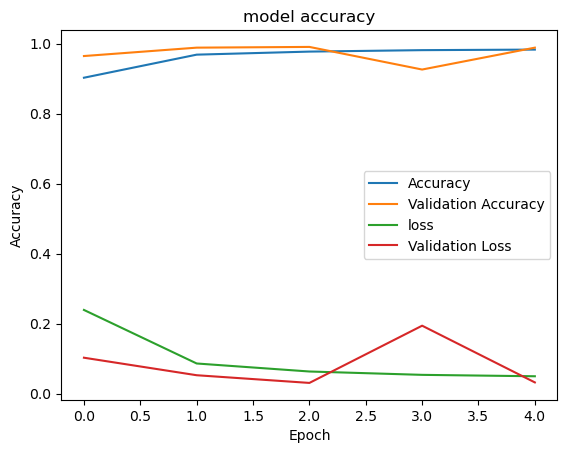

In [14]:
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

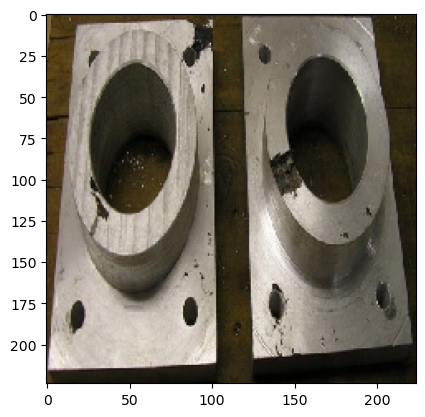

In [15]:
from keras.preprocessing import image
img = keras.utils.load_img("/home/ahmed/Desktop/casting_good_or_defected.jpg",target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)



In [17]:

from keras.models import load_model
saved_model = load_model("vggclf_v10.h5")
output = saved_model.predict(img)
print(output[0][0])
print(output[0][1])
if output[0][0] > output[0][1]:
    print("defected")
else:
    print("good")

1/1 [==============================] - 0s 206ms/step
1.0
0.0
defected


In [ ]:
# y_pred = model.predict(x_test)

# y_pred_=np.argmax(y_pred, axis=1)
# y_test_=np.argmax(y_test, axis=1)

# # print(y_test)


# print(classification_report(y_test_, y_pred_))
# print (confusion_matrix(y_test_, y_pred_))


# # # Precision= TP/(TP + FP) = Accuracy of positive predictions.

# # # Recall = TP/(TP+FN) = Fraction of positives that were correctly identified.

# # # F1 Score = 2*(Recall * Precision) / (Recall + Precision) = What percent of positive predictions were correct? 